# Exploratory Data Analysis (EDA) Notebook

## **Overview**
This notebook performs an in-depth **Exploratory Data Analysis (EDA)** on the cleaned COVID-19 datasets. The objective is to uncover patterns, trends, and insights from the data to better understand the global impact of the COVID-19 pandemic.

---

## **Included in this Notebook**
1. **Dataset Overview**: 
   - Description of datasets used.
   - Key columns and their significance.
   - Summary statistics.

2. **Global Analysis**:
   - Visualizations of global trends in confirmed cases, deaths, recoveries, and vaccinations.
   - Cumulative trends over time.

3. **Country-Level Analysis**:
   - Top 10 countries most affected by COVID-19.
   - Regional breakdown of cases, deaths, and recoveries.

4. **Vaccination Analysis**:
   - Trends in global vaccination progress.
   - Comparison of vaccination rates across continents.

5. **Correlation Analysis**:
   - Analysis of the relationship between mortality rate and case fatality rate.
   - Scatter plot visualizations of significant correlations.

6. **Key Visualizations**:
   - Line plots, bar plots, scatter plots, and pie charts.
   - All visualizations saved in the `reports/visuals/` directory for reporting.

---

## **Key Findings**
1. **Global Trends**:
   - The number of confirmed cases increased sharply during specific waves of the pandemic.
   - Mortality rates show a decline over time due to improved treatments and vaccination rollouts.

2. **Most Affected Regions**:
   - Countries like the USA, India, and Brazil have the highest confirmed cases and deaths.
   - Recovery rates are consistent across regions, with a few exceptions.

3. **Vaccination Progress**:
   - Developed countries have a significantly higher vaccination rate compared to developing countries.
   - Global vaccination campaigns are contributing to a decline in cases and deaths.

4. **Correlation Insights**:
   - There is a positive correlation between case fatality rate and mortality rate.
   - Countries with better healthcare infrastructure tend to have lower mortality rates despite high case numbers.



In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px


In [3]:
#loading the cleaned datasets form the cleaned processed dataset 
confirmed=pd.read_csv(r"C:\Users\sanga\Documents\COVID19_EDA_Project\data\processed\cleaned_confirmed_cases.csv")
deaths=pd.read_csv(r"C:\Users\sanga\Documents\COVID19_EDA_Project\data\processed\cleaned_deaths.csv")
recovered=pd.read_csv(r"C:\Users\sanga\Documents\COVID19_EDA_Project\data\processed\cleaned_recovered.csv")
vaccinations=pd.read_csv(r"C:\Users\sanga\Documents\COVID19_EDA_Project\data\processed\cleaned_vaccinations.csv")


In [4]:
#Understanding the data 
confirmed.info()
deaths.info()
recovered.info()
vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1148 entries, Unnamed: 0 to 3/9/23
dtypes: float64(2), int64(1144), object(2)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1148 entries, Unnamed: 0 to 3/9/23
dtypes: float64(2), int64(1144), object(2)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1148 entries, Unnamed: 0 to 3/9/23
dtypes: float64(2), int64(1144), object(2)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1148 entries, Unnamed: 0 to 3/9/23
dtypes: float64(2), int64(1144), object(2)
memory usage: 2.5+ MB


In [5]:
#Descriptive statistics of all the dataframes 

confirmed.describe()
deaths.describe()
recovered.describe()
vaccinations.describe()

,Unnamed: 0,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,289.000000,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,144.000000,19.718719,22.182084,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,83.571327,25.956609,77.870931,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,0.000000,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,72.000000,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,144.000000,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,216.000000,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06
max,288.000000,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,...,1.034435e+08,1.035339e+08,1.035898e+08,1.036487e+08,1.036508e+08,1.036470e+08,1.036555e+08,1.036909e+08,1.037558e+08,1.038027e+08


In [6]:
#checking the structure of the datasets 
print(confirmed.shape)
print(confirmed.columns)


(289, 1148)
Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1148)


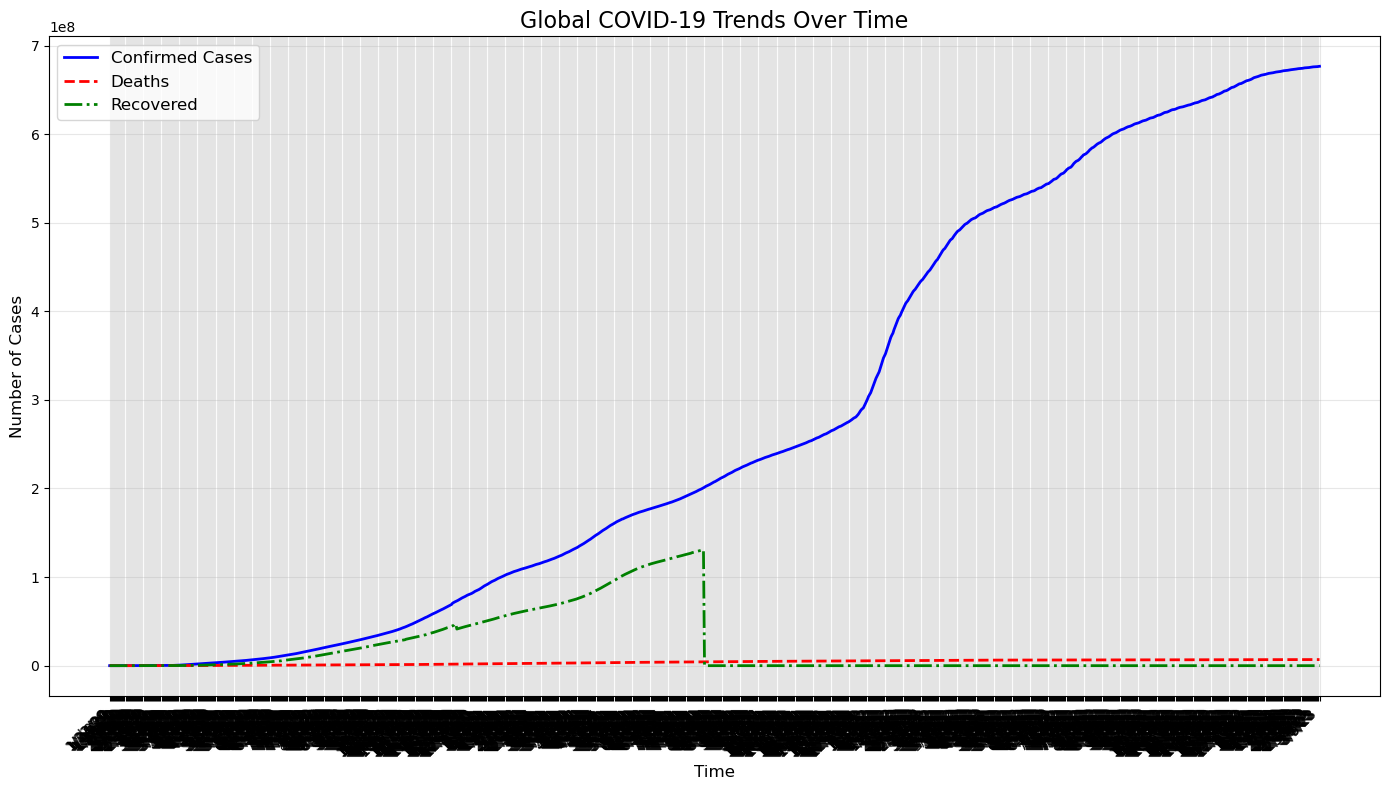

In [56]:
#Exploratory visualizations 
#1). Global Trends over Time:

global_confirmed=confirmed.iloc[:,4:].sum(axis=0)
global_deaths=deaths.iloc[:, 4:].sum(axis=0)
global_recovered=recovered.iloc[:, 4:].sum(axis=0)


plt.figure(figsize=(14, 8))
plt.plot(global_confirmed, label='Confirmed Cases', color='blue', linewidth=2)
plt.plot(global_deaths, label='Deaths', color='red', linewidth=2, linestyle='--')
plt.plot(global_recovered, label='Recovered', color='green', linewidth=2, linestyle='-.')
plt.title('Global COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(fontsize=12, loc='upper left')  # Adjust legend position to avoid overlapping
plt.grid(alpha=0.3)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()  # Ensure no labels or elements are cut off
plt.savefig(r'C:\Users\sanga\Documents\COVID19_EDA_Project\reports\visuals\global_covid19_trends.jpg', dpi=300, bbox_inches='tight')
plt.show()



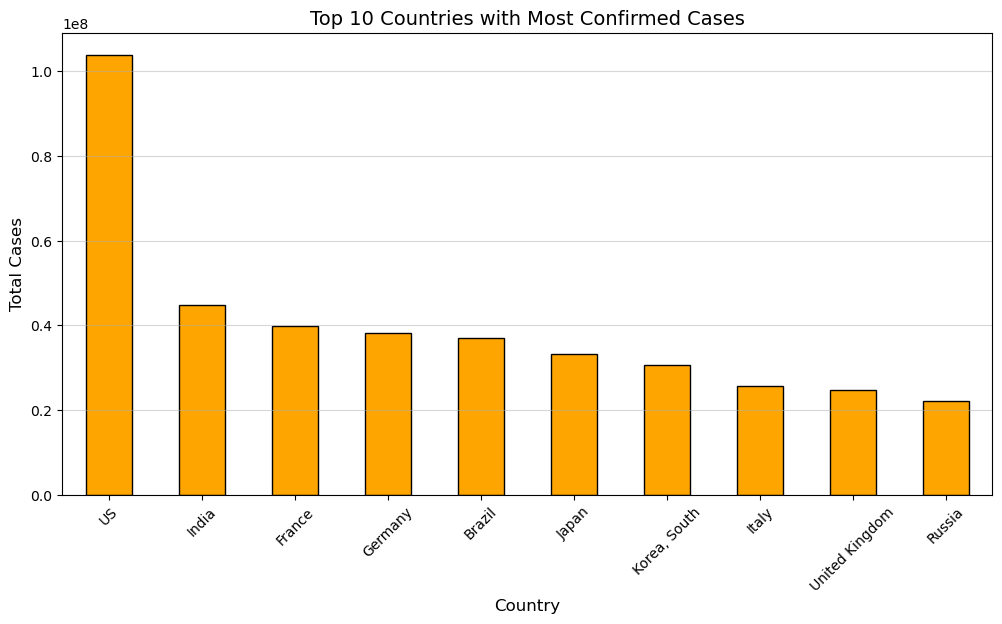

In [57]:
#Country level Insights 

#Top 10 affected Countries 
top_countries=confirmed.groupby('Country/Region').sum().iloc[:, -1].sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='orange', figsize=(12,6), edgecolor='black')
plt.title("Top 10 Countries with Most Confirmed Cases", fontsize=14)
plt.ylabel("Total Cases", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.savefig(r'C:\Users\sanga\Documents\COVID19_EDA_Project\reports\visuals\top_10_countries_with_most_confirmed_cases.jpg', dpi=300, bbox_inches='tight')
plt.show()


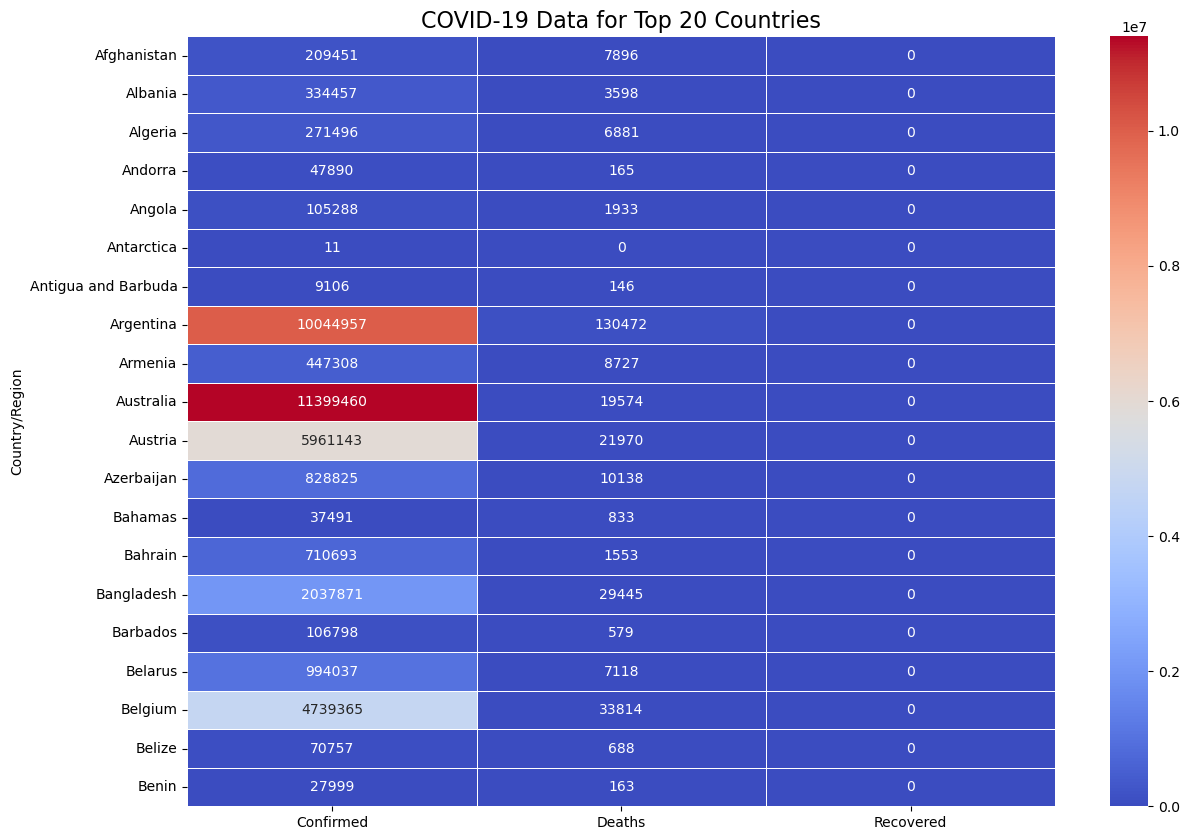

In [58]:
#Heatmap for the country level Data 
country_data=pd.DataFrame({
    'Confirmed' : confirmed.groupby('Country/Region').sum().iloc[:, -1],
    'Deaths' : deaths.groupby('Country/Region').sum().iloc[:, -1],
    'Recovered' : recovered.groupby('Country/Region').sum().iloc[:, -1]
})

plt.figure(figsize=(14,10))
sns.heatmap(country_data.head(20), annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)
plt.title('COVID-19 Data for Top 20 Countries', fontsize=16)
plt.savefig(r'C:\Users\sanga\Documents\COVID19_EDA_Project\reports\visuals\data_for_top_20_countries.jpg', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\sanga\AppData\Local\Temp\ipykernel_14756\1339148709.py:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



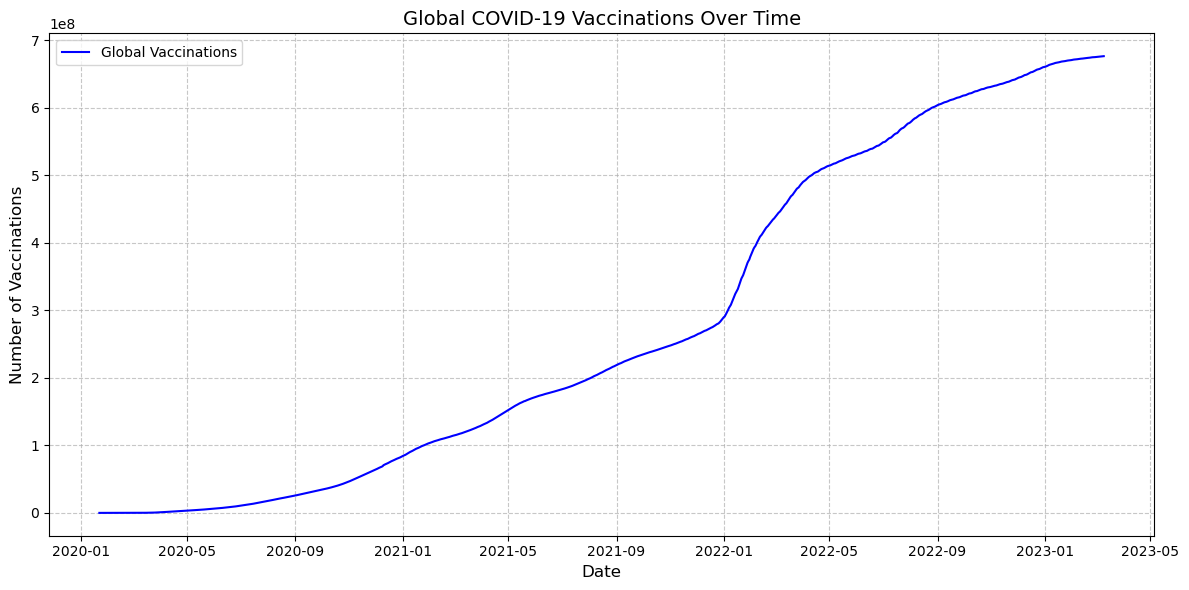

In [59]:
# Data Preparation: Aggregating vaccination data globally

# Dropping unnecessary columns for aggregation
vaccination_data_cleaned = vaccinations.drop(columns=["Unnamed: 0", "Province/State", "Lat", "Long", "date"])

# Summing up vaccination data across all countries
vaccination_data_aggregated = vaccination_data_cleaned.groupby("Country/Region").sum()

# Transposing the data to have dates as rows for easier plotting
vaccination_time_series = vaccination_data_aggregated.T
vaccination_time_series.index = pd.to_datetime(vaccination_time_series.index, errors="coerce")

# Creating a global total for each date
vaccination_time_series["Global Total"] = vaccination_time_series.sum(axis=1)

# Plotting the global vaccination trend
plt.figure(figsize=(12, 6))
plt.plot(vaccination_time_series.index, vaccination_time_series["Global Total"], label="Global Vaccinations", color="blue")
plt.title("Global COVID-19 Vaccinations Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Vaccinations", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\sanga\Documents\COVID19_EDA_Project\reports\visuals\vaccinations_over_time.jpg', dpi=300, bbox_inches='tight')
plt.show()


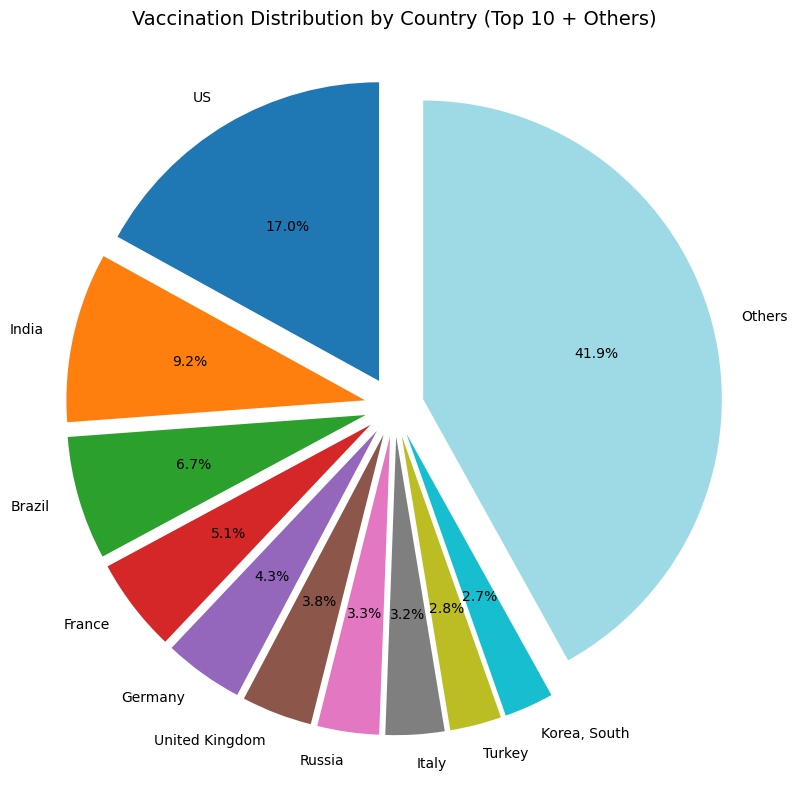

In [68]:
# Calculating the total vaccinations for each country
# Exclude non-numeric columns before summation
numeric_vaccinations = vaccinations.select_dtypes(include=[np.number])
country_vaccinations = numeric_vaccinations.groupby(vaccinations["Country/Region"]).sum().sum(axis=1)

# Selecting top 10 countries by total vaccinations
top_countries = country_vaccinations.sort_values(ascending=False).head(10)

# Calculating the "Others" category for the remaining countries
others = country_vaccinations.sort_values(ascending=False)[10:].sum()
top_countries["Others"] = others

# Plotting the pie chart
plt.figure(figsize=(10, 8))
top_countries.plot.pie(autopct="%1.1f%%", startangle=90, colormap="tab20", explode=[0.1] * len(top_countries))
plt.title("Vaccination Distribution by Country (Top 10 + Others)", fontsize=14)
plt.ylabel("")  # Hide the default ylabel
plt.tight_layout()
plt.savefig(r'C:\Users\sanga\Documents\COVID19_EDA_Project\reports\visuals\vaccination_distribution', dpi=300, bbox_inches='tight')
plt.show()


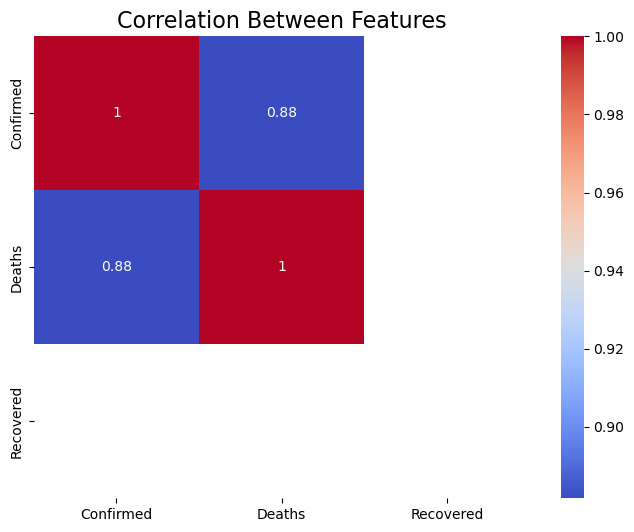

In [61]:
#Correlation matrix for all the variables 
combined = pd.DataFrame({
    'Confirmed': confirmed.iloc[:, -1],
    'Deaths': deaths.iloc[:, -1],
    'Recovered': recovered.iloc[:, -1],
})
plt.figure(figsize=(8, 6))
sns.heatmap(combined.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features', fontsize=16)
plt.savefig(r'C:\Users\sanga\Documents\COVID19_EDA_Project\reports\visuals\correlation.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [66]:
#Time Series Analysis 
fig = px.line(x=confirmed.columns[4:], y=global_confirmed.values,
              labels={'x':'Date','y': 'Confirmed Cases'},
              title='Interactive Plot of Global Confirmed Cases over Time'
)

fig.show()

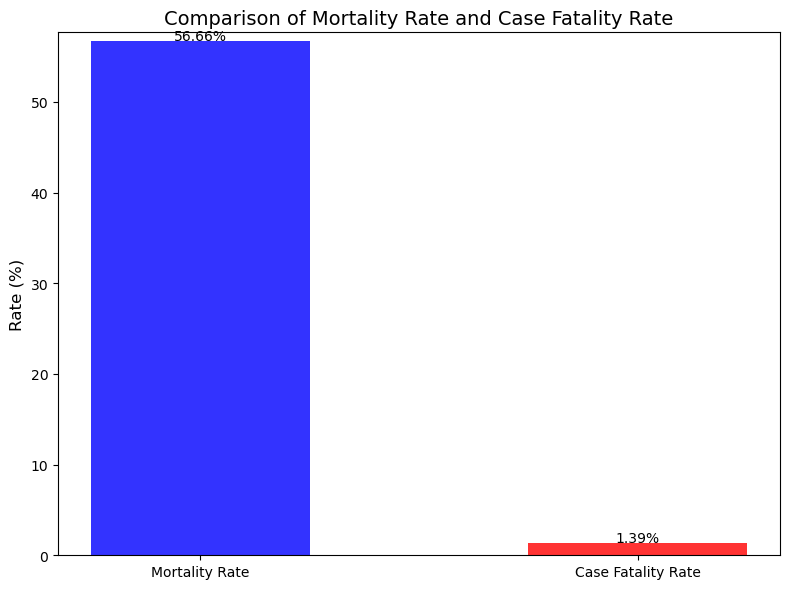

In [65]:
total_deaths = deaths.iloc[:, 4:].sum().sum()  
total_confirmed = confirmed.iloc[:, 4:].sum().sum() 
total_population = 7800000000  

# Calculations
mortality_rate = (total_deaths / total_population) * 100
case_fatality_rate = (total_deaths / total_confirmed) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
x_labels = ['Mortality Rate', 'Case Fatality Rate']
y_values = [mortality_rate, case_fatality_rate]

ax.bar(x_labels, y_values, color=['blue', 'red'], alpha=0.8,width=[0.5,0.5])
ax.set_title('Comparison of Mortality Rate and Case Fatality Rate', fontsize=14)
ax.set_ylabel('Rate (%)', fontsize=12)
ax.set_ylim(0, max(y_values) + 1)

# Annotating values on bars
for i, v in enumerate(y_values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig(r'C:\Users\sanga\Documents\COVID19_EDA_Project\reports\visuals\mortality_and_fatality_comparison.jpg', dpi=300, bbox_inches='tight')
plt.show()
